In [31]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
%matplotlib inline

In [8]:
cols=["ref_gene_id","ref_id","class_code","qry_gene_id","qry_id","num_exons","FPKM","TPM"	,"cov","len","major_iso_id","ref_match_len"]

In [56]:
df=pd.read_csv("./merged.SRR1085402.gtf.tmap",names=cols,sep="\t",skiprows=1)
df=df[~(df['ref_id']=="-")].reset_index(drop=True)


,ref_gene_id,ref_id,class_code,qry_gene_id,qry_id,num_exons,FPKM,TPM,cov,len,major_iso_id,ref_match_len
0,OR4F29,rna47,=,STRG.2,STRG.2.1,1,0.038429,0.101781,0.161874,939,STRG.2.1,939
1,LOC100132287,rna48,=,STRG.4,STRG.4.1,3,3.601528,9.538721,15.170559,4370,STRG.4.1,4370
2,LOC729737,rna18,=,STRG.8,STRG.8.1,3,3.383144,8.960327,14.250670,5474,STRG.8.1,5474
3,OR4F16,rna57,=,STRG.10,STRG.10.1,1,0.115288,0.305343,0.485623,939,STRG.10.1,939
4,LOC100288069,rna71,=,STRG.11,STRG.11.1,7,0.524417,1.388929,2.208978,1371,STRG.11.1,1371
5,LOC107984841,rna64,=,STRG.15,STRG.15.4,6,0.134036,0.354997,0.564594,504,STRG.15.1,504
6,LOC107984841,rna60,=,STRG.15,STRG.15.5,6,0.020932,0.055440,0.088173,660,STRG.15.1,660
7,LOC107984841,rna63,=,STRG.15,STRG.15.8,5,0.250415,0.663230,1.054813,447,STRG.15.1,447
8,LOC107984841,rna61,=,STRG.15,STRG.15.9,5,0.232446,0.615639,0.979124,448,STRG.15.1,448
9,LOC107984841,rna59,=,STRG.15,STRG.15.10,5,0.065318,0.172995,0.275135,448,STRG.15.1,448


In [57]:
df=pd.read_csv("./merged.SRR1085402.gtf.tmap",names=cols,sep="\t",skiprows=1)
df=df[~(df['ref_id']=="-")].reset_index(drop=True)
df[df["class_code"]=="="].reset_index(drop=True)
df=df[["ref_id","ref_gene_id","TPM"]]
df.head()

,ref_id,ref_gene_id,TPM
0,rna47,OR4F29,0.101781
1,rna48,LOC100132287,9.538721
2,rna18,LOC729737,8.960327
3,rna57,OR4F16,0.305343
4,rna71,LOC100288069,1.388929


In [58]:
df1=pd.read_csv("./merged_k1_MF.SRR1085402.gtf.tmap",names=cols,sep="\t",skiprows=1)
df1=df1[~(df1['ref_id']=="-")].reset_index(drop=True)
df1[df1["class_code"]=="="].reset_index(drop=True)
df1=df1[["ref_id","ref_gene_id","TPM"]]
df1.head()

,ref_id,ref_gene_id,TPM
0,rna47,OR4F29,0.101778
1,rna48,LOC100132287,9.697316
2,rna18,LOC729737,9.133313
3,rna57,OR4F16,0.305335
4,rna71,LOC100288069,1.498617


In [59]:
res=df.merge(df1,on=["ref_id","ref_gene_id"],how="outer",indicator=True)
res["TPM_y"]=np.where(res["_merge"]=="left_only",0.0,res["TPM_y"])
res["TPM_x"]=np.where(res["_merge"]=="right_only",0.0,res["TPM_x"])
res[(res["_merge"]=="left_only") | (res["_merge"]=="right_only")]

,ref_id,ref_gene_id,TPM_x,TPM_y,_merge
10169,rna15076,MAP1LC3C,7.490972,0.000000,left_only
27437,rna103669,RNF219,13.466588,0.000000,left_only
28053,rna157940,TUBGCP3,1.772533,0.000000,left_only
31080,rna158026,SERPINA1,2.163449,0.000000,left_only
31089,rna109911,LOC102723623,2.139830,0.000000,left_only
34442,rna158104,GOLGA6L1,3.970089,0.000000,left_only
34505,rna159987,CHRFAM7A,1.705176,0.000000,left_only
39442,rna158321,FOPNL,1.869395,0.000000,left_only
40841,rna122764,LOC105371559,1.731600,0.000000,left_only
45974,rna158536,TBC1D3J,1.703878,0.000000,left_only


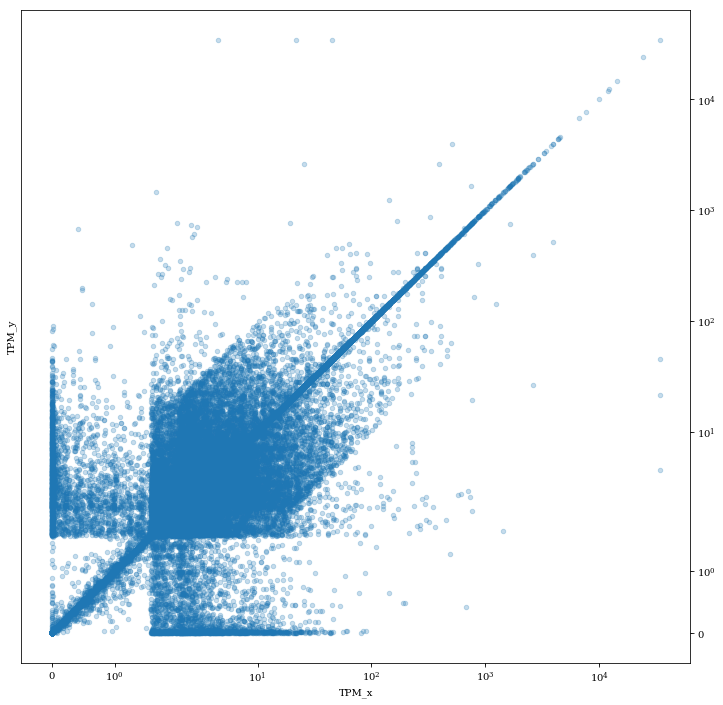

In [60]:
fig1, axes = plt.subplots(ncols=1,nrows=1,figsize=(12,12))
axes.yaxis.tick_right()
res.plot.scatter(x="TPM_x",y="TPM_y",ax=axes,alpha=0.25)
axes.set_yscale("symlog")
axes.set_xscale("symlog")

In [61]:
res["diff"]=res["TPM_x"]-res["TPM_y"]
res.sort_values(by="diff",inplace=True)
res[res["ref_id"]=="gene60066"]

,ref_id,ref_gene_id,TPM_x,TPM_y,_merge,diff
100772,gene60066,COX1,4.529247,34315.050781,both,-34310.521534
100768,gene60066,COX1,21.599255,34315.050781,both,-34293.451526
100764,gene60066,COX1,45.077202,34315.050781,both,-34269.973579
100773,gene60066,COX1,4.529247,45.076080,both,-40.546833
100769,gene60066,COX1,21.599255,45.076080,both,-23.476825
100774,gene60066,COX1,4.529247,21.598717,both,-17.069470
100775,gene60066,COX1,4.529247,4.529134,both,0.000113
100770,gene60066,COX1,21.599255,21.598717,both,0.000538
100765,gene60066,COX1,45.077202,45.076080,both,0.001122
100760,gene60066,COX1,34316.308594,34315.050781,both,1.257813


In [ ]:
""